# Problem set 4 solutions accompanyment

This notebook accompanies the solutions to problem set 4. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import solve_ivp

## Q2 Study of the wine cellar problem 

You are asked to plot exact numerical solutions of the wine cellar problem as compared to the exact solution. This is just an application to make sure you can code things properly. Review the script used in lectures, and principally lecture 15. 

This is not an easy problem because the numbers are so fidgety. You have to choose the timesteps just right for things to look OK. 

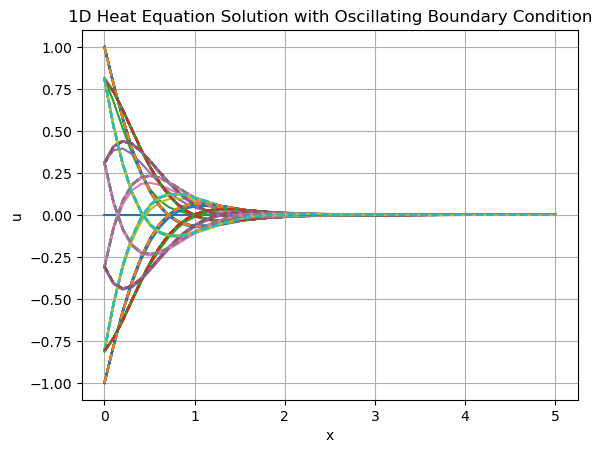

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to solve heat equation using finite differences
def solve_heat_equation(u_initial):
    u_new = np.copy(u_initial)
    for i in range(1, Nx - 1):
        u_new[i] = u_initial[i] + kappa * (dt/dx**2) * (u_initial[i+1] - 2*u_initial[i] + u_initial[i-1])
    return u_new

# Parameters
kappa = 0.635  # Diffusion coefficient 0.002cm^2/s = 2e-7 m^2/s = 3.2 e-3 m^2/years
omega = 2*np.pi # In 1/year

# Make a vector for the 'x' 
L = 5  # Length of the domain
Nx = 50  # Number of grid points
x = np.linspace(0, L, Nx) 
dx = x[1] - x[0] # Get the grid spacing by subtracting 

# Make a vector for time 
tmax = 10 # Max time
Nt = 10000 # Number of time steps
t = np.linspace(0, tmax, Nt) 
dt = t[1] - t[0] # get the dt by subtracting two elements

k = 100  # Plotting frequency
A = 1    # Amplitude for the BC

# The initial condition doesn't matter much; here we set it to 0
u_initial = 0*x 

# Exact solution 
u_exact = lambda x, t: A*np.exp(-np.sqrt(omega/(2*kappa))*x)*np.cos(-np.sqrt(omega/(2*kappa))*x + omega*t)

# Solve heat equation and plot solution every k timesteps
u = u_initial
for tcount in range(Nt):
    tt = t[tcount] # Get the current time 

    # Print the profile every 'k' steps
    if tcount % k == 0:        
        plt.plot(x, u)
        plt.plot(x, u_exact(x,tt), '--')

    # Set the initial condition
    u[0] = A*np.cos(omega*tt)
    u = solve_heat_equation(u)    

# Plot final solution
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Equation Solution with Oscillating Boundary Condition')
plt.grid(True)
plt.show()


## Q4a Sketching of solutions

The problem set gives you a graph of the RHS of an ODE and asks you to sketch different solutions. This can be done by hand but here we show how it can be done numerically. The point is that because this is phase line analysis, then the solution must only be increasing or decreasing monotonically. 

In parts b and c, the question asks you to investigate for different values of 'C' and 'gamma'. In order to provide this flexibility, we will define some of the functions below to accept gamma as an argument.

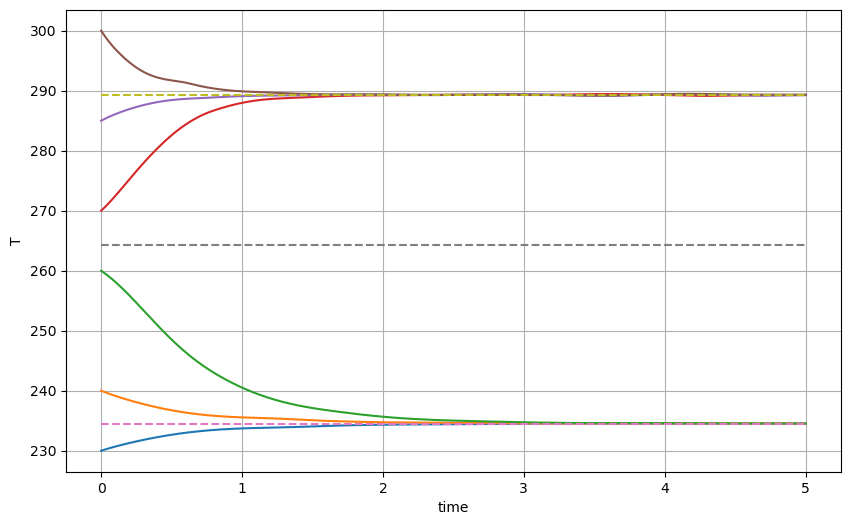

In [40]:
Q = 342; sigma = 5.67e-8; 
a = lambda T: 0.5 - 0.2*np.tanh(0.1*(T-265));
G = lambda T, gam: (Q*(1-a(T)) - sigma*gam*T**4)

# Approximate steady states for the case of C = 1 and gamma = 0.6
gam = 0.6;
fwd = lambda T: G(T, gam)
sol = root(fwd, [230]); T1 = sol.x[0];
sol = root(fwd, [265]); T2 = sol.x[0];
sol = root(fwd, [287]); T3 = sol.x[0];

# print(T1)

# Create a function file for the ODE solve
tmax = 5
plt.figure(figsize=(10,6))
def solveit(T0, C, gam):
    # In order to specify the ODE we need a function defined on two elements (t, T); we pass through the dummy variables
    # So first pass through the parameters of C and gamma
    Gode = lambda t, T: 1/C*G(T, gam) 
    sol = solve_ivp(Gode, [0, tmax], [T0], dense_output=True)
    # Plot on a denser mesh
    t = np.linspace(0, tmax, 200)
    T = sol.sol(t); T = T[0];
    plt.plot(t, T)
    
C = 1; gam = 0.6;
solveit(230, C, gam)
solveit(240, C, gam)
solveit(260, C, gam)
solveit(270, C, gam)
solveit(285, C, gam)
solveit(300, C, gam)

plt.plot([0, tmax], [T1, T1], '--')
plt.plot([0, tmax], [T2, T2], '--')
plt.plot([0, tmax], [T3, T3], '--')
plt.grid(1)
plt.xlabel('time');
plt.ylabel('T');